# Описание [датасета](https://www.kaggle.com/datasets/rainbowgirl/clustering-categorical-peoples-interests/data)

Есть 4 группы людей и 217 вопросов об их интересах (например, "нравится ли Вам играть в шахматы?", "нравится ли Вам плавать?"). Требуется кластеризовать людей по их интересам. 

# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("../data/clustering_interests/interests_group.csv")

In [3]:
df.head()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN


In [4]:
interest_columns = list(df.columns)[2:]
df.columns = ["group", "grand_tot_interests"] + list(
    map(lambda x: int(x.replace("interest", "")), interest_columns)
)
interest_columns = list(df.columns)[2:]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6340 entries, 0 to 6339
Columns: 219 entries, group to 217
dtypes: float64(217), int64(1), object(1)
memory usage: 10.6+ MB


In [6]:
df.describe()

,grand_tot_interests,1,2,3,4,5,6,7,8,9,...,208,209,210,211,212,213,214,215,216,217
count,6340.000000,993.0,1.0,35.0,25.0,798.000000,3394.000000,1.0,93.0,333.000000,...,118.000000,110.0,5037.000000,2474.000000,877.000000,2.0,72.0,4943.000000,4058.000000,147.0
mean,37.312303,1.0,1.0,1.0,1.0,1.001253,1.000589,1.0,1.0,1.003003,...,1.008475,1.0,1.000596,1.000808,1.002281,1.0,1.0,1.000202,1.000246,1.0
std,15.729872,0.0,NaN,0.0,0.0,0.035400,0.024271,NaN,0.0,0.054800,...,0.092057,0.0,0.024400,0.028427,0.047727,0.0,0.0,0.014223,0.015698,0.0
min,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
25%,28.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
50%,39.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
75%,48.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
max,104.000000,1.0,1.0,1.0,1.0,2.000000,2.000000,1.0,1.0,2.000000,...,2.000000,1.0,2.000000,2.000000,2.000000,1.0,1.0,2.000000,2.000000,1.0


In [7]:
df.isna().sum()

group                     0
grand_tot_interests       0
1                      5347
2                      6339
3                      6305
                       ... 
213                    6338
214                    6268
215                    1397
216                    2282
217                    6193
Length: 219, dtype: int64

In [8]:
df['group'].value_counts()

group
I    1809
P    1731
C    1725
R    1075
Name: count, dtype: int64

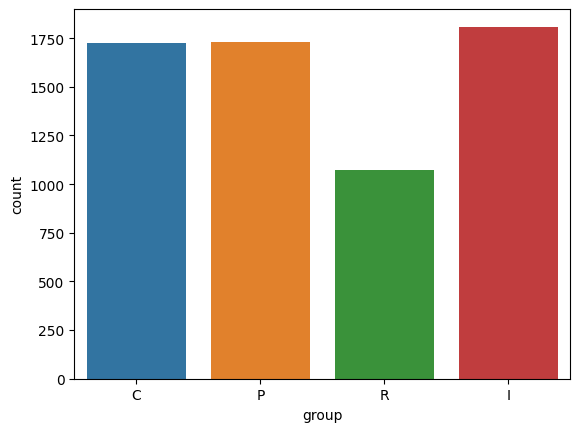

In [9]:
sns.countplot(data=df, x='group');

In [10]:
df[interest_columns].sum().reset_index(name='cnt')

,index,cnt
0,1,993.0
1,2,1.0
2,3,35.0
3,4,25.0
4,5,799.0
...,...,...
212,213,2.0
213,214,72.0
214,215,4944.0
215,216,4059.0


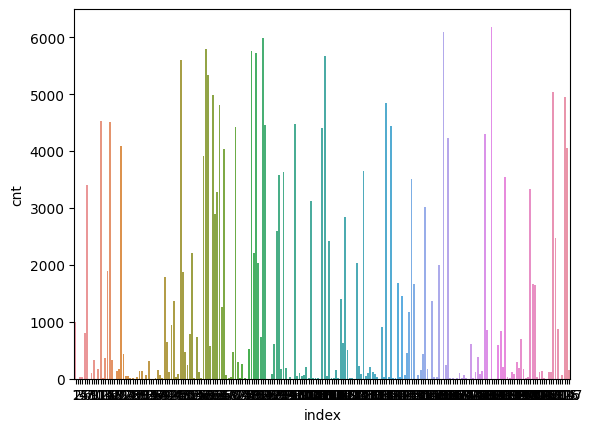

In [11]:
sns.barplot(data=df[interest_columns].sum().reset_index(name='cnt'), x='index', y='cnt');

In [12]:
df[interest_columns].sum().max()

6185.0

In [13]:
df[interest_columns].sum().idxmax()

183

In [14]:
df[interest_columns].sum().min()

1.0

In [15]:
df[interest_columns].sum().idxmin()

2

# Preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
df.fillna(0, inplace=True)

In [18]:
le = LabelEncoder()
df['group'] = le.fit_transform(df['group'])

In [19]:
ground_truth_labels = df['group']
df.drop(columns='group', inplace=True)

In [20]:
df.columns = df.columns.astype(str)

In [21]:
df.isna().sum()

grand_tot_interests    0
1                      0
2                      0
3                      0
4                      0
                      ..
213                    0
214                    0
215                    0
216                    0
217                    0
Length: 218, dtype: int64

In [22]:
RANDOM_STATE = 42

# PCA

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

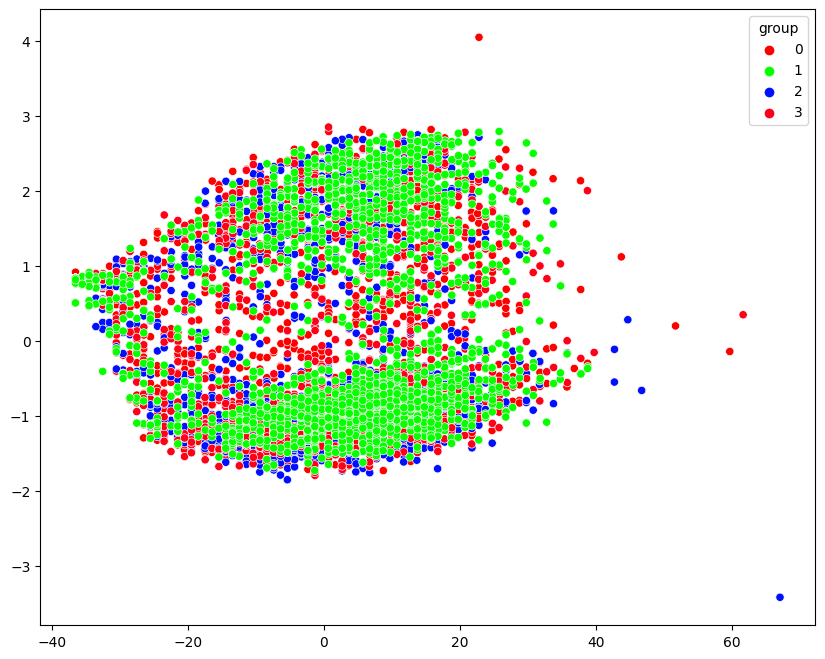

In [25]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=ground_truth_labels, palette=plt.colormaps['hsv']);

# t-SNE

In [26]:
from sklearn.manifold import TSNE

In [27]:
tsne = TSNE(random_state=RANDOM_STATE)
df_tsne = tsne.fit_transform(df)

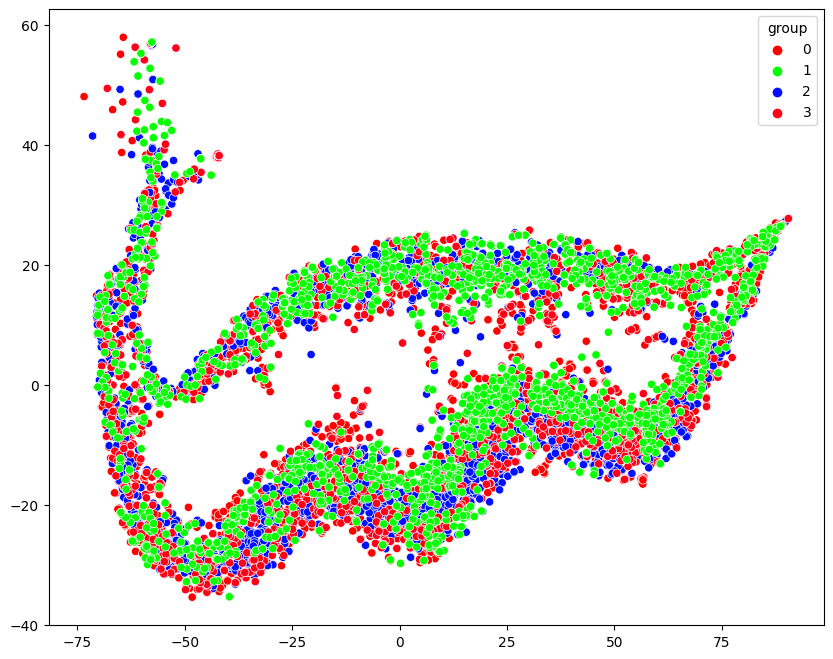

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=ground_truth_labels, palette=plt.colormaps['hsv']);

# MyKMeans

In [29]:
from loguru import logger
import sys

def set_log_level(level):
    logger.remove()
    logger.add(sys.stderr, level=level)

In [30]:
set_log_level('DEBUG')

In [31]:
from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_array

class MyKMeans(BaseEstimator):
    def __init__(self, n_clusters=5, max_iter=200, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    def predict(self, X):
        logger.debug("Starting prediction")
        pred = self._get_labels(X)
        logger.debug("Prediction successful")
        return pred

    def fit(self, X):
        logger.debug("Starting to fit MyKMeans")

        X = check_array(X)
        rs = np.random.RandomState(self.random_state)
        self.cluster_centers_ = X[rs.choice(len(X), size=self.n_clusters, replace=False), :]
        n_features = X.shape[1]
        max_dist = np.inf
        iters = 0
        
        while max_dist > self.tol and iters <= self.max_iter:
            labels = self._get_labels(X)

            next_means = np.empty((self.n_clusters, n_features))
            for l in np.unique(labels):
                next_means[l] = X[labels == l].mean(axis=0)
            
            max_dist = np.max(np.linalg.norm(self.cluster_centers_ - next_means, axis=1))
            
            self.cluster_centers_ = next_means
        
        logger.debug("Fitted successfully")
        return self

    def fit_predict(self, X):
        X = check_array(X)
        fitted = self.fit(X)
        return fitted.predict(X)
    
    def _get_labels(self, X):
        X = check_array(X)
        # logger.debug(X)
        # logger.debug(X[..., np.newaxis])
        return np.argmin(
            np.linalg.norm(X[..., np.newaxis] - self.cluster_centers_.T, axis=1),
            axis=1
        )


# Обучение

In [32]:
from time import time
from sklearn.metrics import adjusted_rand_score, silhouette_score, homogeneity_score
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, DBSCAN, KMeans, SpectralClustering
from sklearn.base import clone
from itertools import product

In [33]:
def fit(estimator, params, X, labels):
    logger.debug(f"Cloning {estimator}")
    model = clone(estimator).set_params(**params)
    logger.debug(f"Cloned {model} successfully")

    fit_start_time = time()
    logger.debug("Starting fit_predict")
    pred = model.fit_predict(X)
    logger.debug(f"Prediction successful: {pred}")
    fit_time = time() - fit_start_time
    
    return {
        "fit_time": fit_time,
        "ari": adjusted_rand_score(labels, pred),
        "silhouette": silhouette_score(X, pred) if len(pred) > 1 else np.nan,
        "homogeneity": homogeneity_score(labels, pred)
    }

In [34]:
def pick_params(old, new_score, new_params, fit_time):
    if 'best_score' not in old or new_score >= old['best_score']:
        return {
            'fit_time': fit_time,
            'best_score': new_score,
            'best_params': new_params
        }
    return old

def tune(est_name, estimator, possible_params, X, labels):
    logger.debug(f"Tuning {est_name}")
    
    param_names = list(possible_params.keys())
    possible_param_values = list(possible_params.values())
    tune_results = {
        'ari': {},
        'silhouette': {},
        'homogeneity': {}
    }

    for param_values in product(*possible_param_values):
        params = dict(zip(param_names, param_values))
        fit_results = fit(estimator, params, X, labels)

        logger.info(f"{estimator.__class__.__name__}: results for parameters {params}: {fit_results}")
        tune_results['ari'] = pick_params(tune_results['ari'], fit_results['ari'], params, fit_results['fit_time'])
        tune_results['silhouette'] = pick_params(tune_results['silhouette'], fit_results['silhouette'], params, fit_results['fit_time'])
        tune_results['homogeneity'] = pick_params(tune_results['homogeneity'], fit_results['homogeneity'], params, fit_results['fit_time'])
    
    return {    
        'name': estimator.__class__.__name__,
        **tune_results
    }

In [35]:
def run_tune(estimator_list, X, labels):
    return [tune(**est, X=X, labels=labels) for est in estimator_list]


In [36]:
def run(estimator_list, df_list, labels):
    result_df_list = []
    for df in df_list:
        best_results = pd.DataFrame(run_tune(estimator_list, df, labels))
        best_results['dim'] = df.shape[1]
        result_df_list.append(best_results)
    
    return pd.concat(result_df_list)
    

In [134]:
ESTIMATORS = [
    {
        'est_name': 'AgglomerativeClustering',
        'estimator': AgglomerativeClustering(),
        'possible_params': {
            'n_clusters': [2, 4, 7, 10],
            'compute_full_tree': [True, False],
            'linkage': ['ward', 'average',]
        }
    },
    {
        'est_name': 'AgglomerativeClustering',
        'estimator': AgglomerativeClustering(),
        'possible_params': {
            'n_clusters': [2, 4, 7, 10],
            'compute_full_tree': [True, False],
            'linkage': ['ward', 'average']
        }
    },
    {
        'est_name': 'DBSCAN',
        'estimator': DBSCAN(),
        'possible_params': {
            'eps': [0.5, 10],
            'min_samples': [5, 10, 15],
            'algorithm': ['ball_tree', 'kd_tree']
        }
    },
    {
        'est_name': 'KMeans',
        'estimator': KMeans(random_state=RANDOM_STATE),
        'possible_params': {
            'n_clusters': [2, 4, 7, 10],
            'max_iter': [100, 250, 500],
            'tol': [1e-4, 1e-6]
        }
    },
    {
        'est_name': 'SpectralClustering',
        'estimator': SpectralClustering(random_state=RANDOM_STATE),
        'possible_params': {
            'n_clusters': [2, 4, 7, 10],
            'eigen_solver': ['arpack', 'amg'],
        }
    },
    {
        'est_name': 'MyKMeans',
        'estimator': MyKMeans(random_state=RANDOM_STATE),
        'possible_params': {
            'n_clusters': [2, 4, 7, 10],
            'max_iter': [100, 250, 500],
            'tol': [1e-4, 1e-5]
        }
    }
]

In [38]:
df_list = [df, *(PCA(n_components=i).fit_transform(df) for i in [20, 40, 50, 100, 200])]

In [39]:
set_log_level('INFO')

In [214]:
r = run(ESTIMATORS, df_list, ground_truth_labels)

2024-04-23 15:17:50.347 | INFO     | __main__:tune:25 - AgglomerativeClustering: results for parameters {'n_clusters': 2, 'compute_full_tree': True, 'linkage': 'ward'}: {'fit_time': 3.598944664001465, 'ari': 0.00846945830561558, 'silhouette': 0.5369885622740721, 'homogeneity': 0.005744008825735781}
2024-04-23 15:17:53.909 | INFO     | __main__:tune:25 - AgglomerativeClustering: results for parameters {'n_clusters': 2, 'compute_full_tree': True, 'linkage': 'average'}: {'fit_time': 3.0085039138793945, 'ari': 0.00011075656786680713, 'silhouette': 0.4735214276302589, 'homogeneity': 8.537811012106436e-05}
2024-04-23 15:17:57.494 | INFO     | __main__:tune:25 - AgglomerativeClustering: results for parameters {'n_clusters': 2, 'compute_full_tree': False, 'linkage': 'ward'}: {'fit_time': 3.069180488586426, 'ari': 0.00846945830561558, 'silhouette': 0.5369885622740721, 'homogeneity': 0.005744008825735781}
2024-04-23 15:18:01.406 | INFO     | __main__:tune:25 - AgglomerativeClustering: results fo

# Результаты

In [43]:
r = pd.read_csv("./results.csv")

In [46]:
r.head()

,Unnamed: 0,name,ari,silhouette,homogeneity,dim
0,0,AgglomerativeClustering,"{'fit_time': 3.02870774269104, 'best_score': 0...","{'fit_time': 3.069180488586426, 'best_score': ...","{'fit_time': 3.02870774269104, 'best_score': 0...",218
1,1,AgglomerativeClustering,"{'fit_time': 2.9429702758789062, 'best_score':...","{'fit_time': 3.1695942878723145, 'best_score':...","{'fit_time': 2.9429702758789062, 'best_score':...",218
2,2,DBSCAN,"{'fit_time': 0.7894806861877441, 'best_score':...","{'fit_time': 8.56255316734314, 'best_score': 0...","{'fit_time': 0.802405834197998, 'best_score': ...",218
3,3,KMeans,"{'fit_time': 0.13889288902282715, 'best_score'...","{'fit_time': 0.13889288902282715, 'best_score'...","{'fit_time': 0.15521931648254395, 'best_score'...",218
4,4,SpectralClustering,"{'fit_time': 22.521888971328735, 'best_score':...","{'fit_time': 135.2018964290619, 'best_score': ...","{'fit_time': 20.009210348129272, 'best_score':...",218


In [81]:
df_melted = pd.melt(
    r[["name", "ari", "silhouette", "homogeneity", "dim"]],
    id_vars=["name", "dim"],
    value_vars=["ari", "silhouette", "homogeneity"],
    var_name="metric",
    value_name="metric_dict",
)

df_melted["metric_dict"] = (
    df_melted["metric_dict"]
    .map(eval)
    .map(lambda x: {k: v for k, v in x.items() if k != "best_params"})
)

result = df_melted.assign(**pd.DataFrame(df_melted.metric_dict.tolist())).drop(
    "metric_dict", axis=1
)

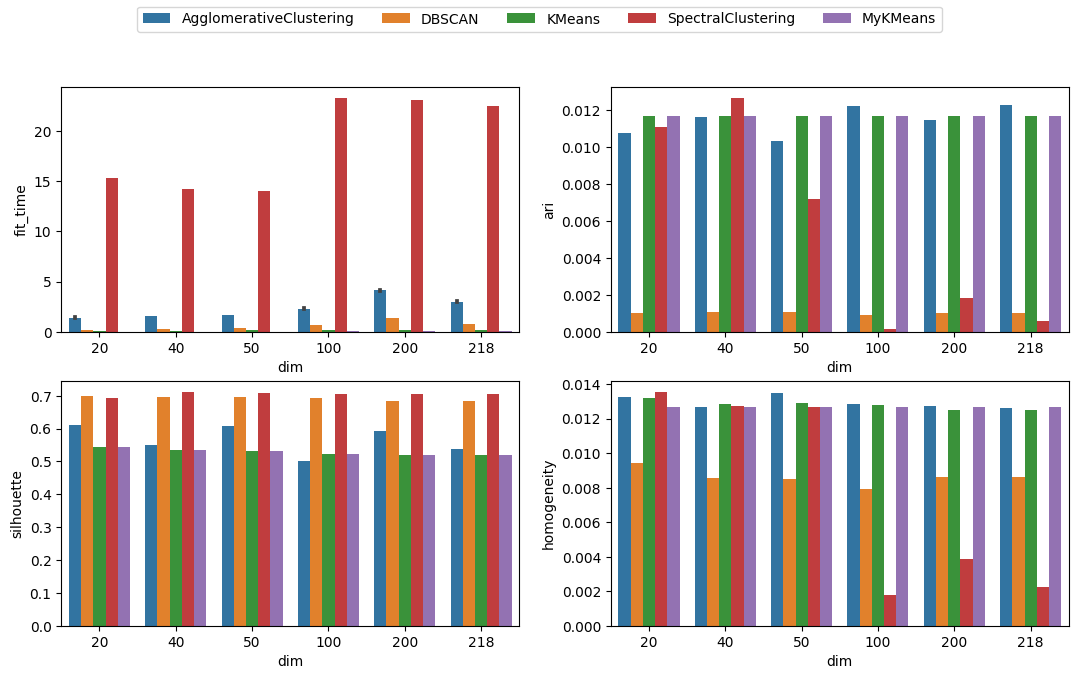

In [125]:
fig, axes = plt.subplots(2, 2, figsize=(13, 7))
handles, legend = None, None
for i, metric in enumerate(['fit_time', 'ari', 'silhouette', 'homogeneity']):
    plot_data = result[result['metric'] == metric] if metric != 'fit_time' else result[result['metric'] == 'ari']
    col = 'best_score' if metric != 'fit_time' else 'fit_time'
    g = sns.barplot(data=plot_data, x='dim', y=col, hue='name', ax=axes[i // 2, i % 2])
    g.legend([], [], frameon=False)
    g.set_ylabel(metric)
    if not handles:
        handles, labels = g.get_legend_handles_labels()
    
fig.legend(handles, labels, loc='upper center', ncols=5);

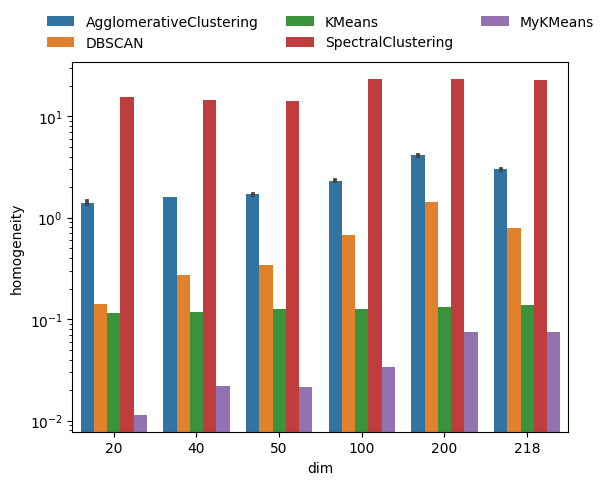

In [132]:
g = sns.barplot(data=result[result['metric'] == 'ari'], x='dim', y='fit_time', hue='name')
g.set_yscale('log')
g.set_ylabel(metric)
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

- `SpectralClustering` обучался дольше других рассмотренных моделей
- Меньше всего времени на обучение занял `MyKMeans`
- В среднем уменьшение размерности не влияет не результат, за исключением `SpectralClustering`, где уменьшение размерности до 50 или меньше привело к значительному улучшению
- `AgglomerativeClustering`, `KMeans` и `MyKMeans` показывают схожий результат
- Лучше всего работают `AgglomerativeClustering` и `SpectralClustering` (особенно с маленькой размерностью)
- Хуже всего --- `DBSCAN`